# Predicting Bitcoin prices with linear regression and gradient descent.

### I'm going to show how gradient descent works on a linear regression, using bitcoin prices and its number of searches on Google.

Let's assume there is a relationship between how many times bitcoin is searched on Google with its price, so let's plot a graph where the y-axis is the price and x the number of searches, plot a line that best fits our data, and try to predict the price based on a number of searches.

The point is to show how gradient descent works, using Python and numpy. **Not to have an accurate bitcoin price prediction**.


## We can plot a line using the equation:

`y = mx + b`

However, we need to find the optimal values for m and b, to draw a line that best fits our data, where m is the line slope and b is where the line intercepts the y-axis, with gradient descent we can find an optimal value for them

### But what is gradient descent?

Gradient descent is an optimization technique that helps decrease the error generated by an error function, here the error function is the **Sum of the Squared Errors**.

![Alt text](http://statutor.org/c3/glmregression/IMAG004.JPG)
Imagine this line was drawn with guessed values for `m` and `b`. The error is the sum of the distance from the points to the line squared and divided by the number of points 


### How can we decrease the error?

We can blindly guest values for `m` and `b` and check if the error decreased, however this approach is not sane. 
if we calucalte the partial derivate we will know how fast the error value is moving, therefore we can update smartly the values. 
Think as a ball moving downhill, where the bottom is where we want to reach and the derivate will tell us how to move in order to get closer to the bottom
![Atl text](http://adventuresinmachinelearning.com/wp-content/uploads/2017/03/Gradient-descent-300x156.jpg)
*In our example the x-axis is `m` or `b`*.


## Finding the optimal value of  `m` and `b` on code

### Steps:

1. Extract Bitcoin prices and number of Google searches.
2. Match the price with search date.
3. Set our hyper paremeters: epoch, learning rate, `m` and `b`.
4. Calculate the error so we can check our algorirthm learning.
5. Calculate the gradient: The derivate of `m` and the derivate of `b`.
6. Multiply by the learning rate and update with the difference from the current `m` and `b`.


In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

# 1. Extract Bitcoin prices and number of Google searches.
bitcoin_interest = {}

with open('bitcoin-interest.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        bitcoin_interest[row[0]] = row[1]
        
price_and_interest = []
with open('market-price.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        # 2. Match the price with search date.
        if bitcoin_interest.get(row[0], None):
            price_and_interest.append([int(bitcoin_interest.get(row[0])),  float(row[1])])


## Let's plot the data and visualize on a graph

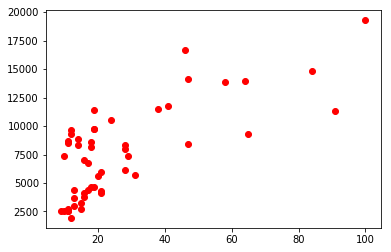

In [2]:
data = np.array(price_and_interest)
x, y = data.T
plt.plot(x,y, 'ro')

Initial error rate: 73763752.8884
Final error rate: 18770865.1997
Final m: 295.251044955
Final b: 220.838673363


/Users/MarcioK/anaconda3/envs/linear_algebra/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


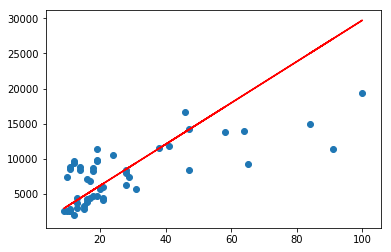

In [16]:
def calculate_error(points, m, b):
    # Error is calculated by the average distance from the points to the line
    error = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        
        # Moving y to the other side of the equation
        # y = mx + b ->  = mx + b - y
        error += (y - (m*x + b))**2
    
    # Calculating average
    return error / float(len(points))

def gradient_descent(points, b, m, learning_rate):
    m_gradient = 0
    b_gradient = 0
    
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        
        b_gradient += -(2/N) * (y - ((m * x) + b))
        m_gradient += -(2/N) * x * (y - ((m * x) + b))

    m_updated = m - (m_gradient * learning_rate)
    b_updated = b - (b_gradient * learning_rate)
    
    return b_updated, m_updated


# 3.Set our hyper paremeters: epoch, learning rate, m and b.

learning_rate = 0.0001
epochs = 1000
start_m = 0
start_b = 0
error = calculate_error(data, start_m, start_b)
print("Initial error rate: " + str(error))

for i in range(epochs):
    # 4. Calculate the error so we can see our algorirthm learning.
    error = calculate_error(data, start_m, start_b)
    # 5. Calculate the gradient:
    start_m, start_b = gradient_descent(data, start_m, start_b, learning_rate)
    
print("Final error rate: " + str(error))
print("Final m: " + str(start_m))
print("Final b: " + str(start_b))    

fig, ax = plt.subplots()
ax.plot(x, start_m * x + start_b, color='red')
ax.scatter(x, y)

fig.show()
   
